<a href="https://colab.research.google.com/github/AnkitAurora/Sentiment_Analysis_Twitter/blob/main/Sentiment_Analysis_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Description : This is sentiment Analysis program that parses the tweets fetched from Twitter using Python

In [4]:
# import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [31]:
from google.colab import files
uploaded = files.upload()

Saving Login_1.csv to Login_1.csv


In [32]:
log = pd.read_csv('Login_1.csv')

In [38]:
# Twitter API Credentials
consumerKey = log['Key'][0]
consumerSecret = log['Key'][1]
accessToken = log['Key'][2]
accessTokenSecret = log['Key'][3]

In [39]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

In [40]:
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

In [41]:
# Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [51]:
# Extract 100 Tweets from the twitter user
posts = api.user_timeline(screen_name = "BILLGATES", count = 100, lang = "en", tweet_mode = "extended")

# Print last 5 tweets from the account
print("show the 5 recent tweets:\n")

i = 1
for tweet in posts[0:5]:
  print(str(i) + ') ' +tweet.full_text + '\n')
  i = i + 1

show the 5 recent tweets:

1) RT @WSJMag: In a digital cover story, we talked to @BillGates about his new book, "How to Avoid a Climate Disaster." https://t.co/9thx4nORe…

2) The world’s power to invent makes me hopeful about climate change. Breakthrough Energy supports the innovations that will lead the world to net-zero emissions. https://t.co/yBb8HMKAmJ

3) To avoid a climate disaster, we need to eliminate emissions from the ways we create electricity, grow food, make things, move around, and heat and cool our buildings. It won’t be easy, but I believe we can do it. This book is about what it will take. https://t.co/xyzs0x6CwB

4) I enjoyed spending time with @andersoncooper recently in Seattle. We talked about why I’m optimistic that the world can get to zero greenhouse gas emissions and avoid a climate disaster: https://t.co/exodP9bavN https://t.co/2t0VncI0pA

5) I’m thrilled to join @Trevornoah, @AlokSharma_RDG, @iamrashidajones, @andersoncooper, @DonCheadle, @SavannahGuthrie, @k

In [52]:
# Create a datafram with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])

# show the first 5 rows of data
df.head()

,Tweets
0,"RT @WSJMag: In a digital cover story, we talke..."
1,The world’s power to invent makes me hopeful a...
2,"To avoid a climate disaster, we need to elimin..."
3,I enjoyed spending time with @andersoncooper r...
4,"I’m thrilled to join @Trevornoah, @AlokSharma_..."


In [54]:
# Clean the text
# Create a function to clean the tweets

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+','', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT[\s]+','', text)
  text = re.sub(r'https?:\/\/\S+','',text)

  return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

df

,Tweets
0,": In a digital cover story, we talked to abou..."
1,The world’s power to invent makes me hopeful a...
2,"To avoid a climate disaster, we need to elimin..."
3,I enjoyed spending time with recently in Seat...
4,"I’m thrilled to join , _RDG, , , , , , and Mo..."
...,...
95,: Thanks to the commitment of leaders from all...
96,Mosquito City is home to the world’s largest c...
97,Deaths from malaria have been cut by more than...
98,: Vaccines prevent millions of deaths every ye...


In [56]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the Polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,": In a digital cover story, we talked to abou...",0.227273,0.068182
1,The world’s power to invent makes me hopeful a...,0.000000,0.000000
2,"To avoid a climate disaster, we need to elimin...",0.741667,0.391667
3,I enjoyed spending time with recently in Seat...,0.475000,0.250000
4,"I’m thrilled to join , _RDG, , , , , , and Mo...",0.700000,0.600000
...,...,...,...
95,: Thanks to the commitment of leaders from all...,0.412500,0.100000
96,Mosquito City is home to the world’s largest c...,0.725000,0.450000
97,Deaths from malaria have been cut by more than...,0.250000,0.125000
98,: Vaccines prevent millions of deaths every ye...,0.125000,0.000000


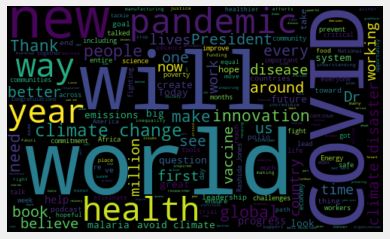

In [57]:
# Plot the Word Cloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [58]:
# Create a function to compute the Negative, Neutral and Positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [60]:
# Create new column called Analysis
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,": In a digital cover story, we talked to abou...",0.227273,0.068182,Positive
1,The world’s power to invent makes me hopeful a...,0.000000,0.000000,Neutral
2,"To avoid a climate disaster, we need to elimin...",0.741667,0.391667,Positive
3,I enjoyed spending time with recently in Seat...,0.475000,0.250000,Positive
4,"I’m thrilled to join , _RDG, , , , , , and Mo...",0.700000,0.600000,Positive
...,...,...,...,...
95,: Thanks to the commitment of leaders from all...,0.412500,0.100000,Positive
96,Mosquito City is home to the world’s largest c...,0.725000,0.450000,Positive
97,Deaths from malaria have been cut by more than...,0.250000,0.125000,Positive
98,: Vaccines prevent millions of deaths every ye...,0.125000,0.000000,Neutral


In [65]:
# print all the positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == "Positive"):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j += 1

1) : In a digital cover story, we talked to  about his new book, "How to Avoid a Climate Disaster." 

2) To avoid a climate disaster, we need to eliminate emissions from the ways we create electricity, grow food, make things, move around, and heat and cool our buildings. It won’t be easy, but I believe we can do it. This book is about what it will take. 

3) I enjoyed spending time with  recently in Seattle. We talked about why I’m optimistic that the world can get to zero greenhouse gas emissions and avoid a climate disaster:  

4) I’m thrilled to join , _RDG, , , , , ,  and Monica Padman, Sal Khan, and Ariel Bissett to discuss how the world can work to avoid a climate disaster:  

5) When it comes to preventing pandemics, scientific tools alone aren’t enough. We also need new capabilities, including a global alert system and infectious disease first responders (or what I like to call a pandemic fire squad):  

6) This has been a year unlike any other in our lifetimes. In our new Annu

In [66]:
# print the negative tweets
j = 1
sortedDF = df.sort_values(by = ['Polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j += 1

1) : Only 3% of Black students learn computer science in high school or beyond. Please watch and share this video. Inspire a studen…

2) COVID-19 has cost lives, sickened millions, and thrust the global economy into a devastating recession. But hope is on the horizon:  

3) Here are four other ways that America can advance its leadership on climate change this year and put the world on a path to zero emissions by 2050:  

4) The President’s commitment to reengage with the world gives me hope that the recovery will reach everyone, including communities of color in the U.S. and people in poor countries around the world.

5) We need to revolutionize the world’s physical economy—and that will take, among other things, a dramatic infusion of ingenuity, funding, and focus from the federal government.

6) Nearly forty million people have Alzheimer’s or dementia today. We have no way to stop or even slow the disease at this point, but I’m hopeful the new Alzheimer’s Disease Data Initiative () 

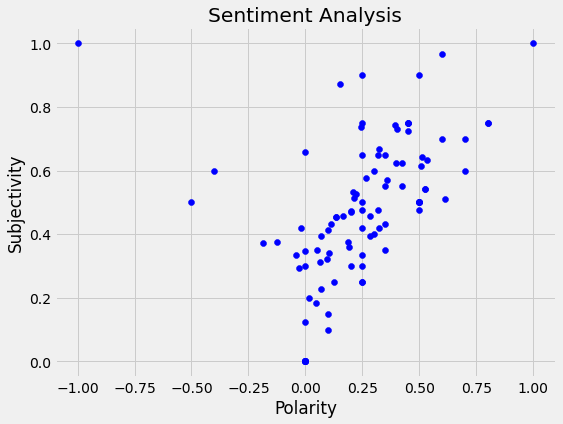

In [67]:
# Plt the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [71]:
# Get the percentage of positive tweets

ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

79.0

In [73]:
# Get the percentage of Negative tweets

ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0]) * 100, 1)

9.0

In [74]:
# Get the percentage of positive tweets

Neutweets = df[df.Analysis == 'Neutral']
Neutweets = Neutweets['Tweets']

round((Neutweets.shape[0] / df.shape[0]) * 100, 1)

12.0

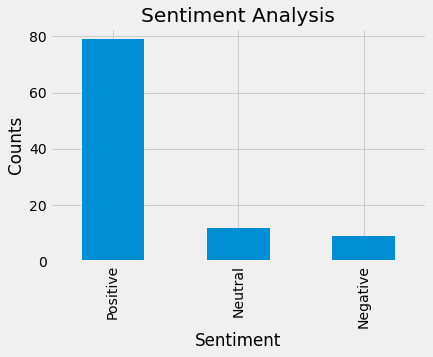

In [76]:
df['Analysis'].value_counts()

# plot and visualize the counts
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()